- (1) 데이터 가져오기

In [4]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

- (2), (3), (4) train, label 분리 및 train test split 하기

In [5]:
df_X = diabetes.data
df_y = diabetes.target

In [6]:
df_X.shape, df_y.shape

((442, 10), (442,))

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state=42)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape, 

((353, 10), (89, 10), (353,), (89,))

In [18]:
import numpy as np
W = np.random.rand(x_train.shape[1])
b = np.random.rand()
W.shape, b

((10,), 0.5392417621893905)

- (5) model 함수 정의

In [28]:
def model(X,W,b):
    predictions = 0
    for i in range(X.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [29]:
model(x_train, W, b)

array([0.67277164, 0.52199523, 0.61532974, 0.38944939, 0.35357562,
       0.37299456, 0.56104525, 0.61582906, 0.50289411, 0.46890352,
       0.47631132, 0.59502471, 0.37576248, 0.64470674, 0.36004722,
       0.59663492, 0.33450909, 0.54446519, 0.59533291, 0.64162913,
       0.51473029, 0.50221687, 0.59777806, 0.67279356, 0.64801246,
       0.55063211, 0.49503834, 0.44383446, 0.48105451, 0.36027612,
       0.5458793 , 0.4943061 , 0.47875838, 0.46652484, 0.60084879,
       0.52511729, 0.51197873, 0.57359633, 0.36449519, 0.58878463,
       0.29896707, 0.75605775, 0.42231734, 0.51755591, 0.54792286,
       0.69377938, 0.58518418, 0.62473367, 0.54652891, 0.43322235,
       0.67410607, 0.34162065, 0.75359159, 0.69910739, 0.40363233,
       0.63922972, 0.70453759, 0.56122211, 0.61702942, 0.60991783,
       0.61165102, 0.62777593, 0.55679547, 0.61138002, 0.70138643,
       0.51535926, 0.55525904, 0.38984995, 0.5586583 , 0.72553171,
       0.62105821, 0.46629422, 0.40630209, 0.45148669, 0.48238

- (6) 손실 함수 정의

In [30]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [39]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

- (7) 기울기 업데이트할 gradient 구현

In [31]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

- (8) 학습률 설정

In [55]:
LEARNING_RATE = 0.01

- (9) 모델 학습

In [56]:
losses = []

for i in range(1, 100000):
    dW, db = gradient(x_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(x_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 3376.6126
Iteration 20 : Loss 3376.0674
Iteration 30 : Loss 3375.5231
Iteration 40 : Loss 3374.9796
Iteration 50 : Loss 3374.4370
Iteration 60 : Loss 3373.8953
Iteration 70 : Loss 3373.3544
Iteration 80 : Loss 3372.8143
Iteration 90 : Loss 3372.2751
Iteration 100 : Loss 3371.7368
Iteration 110 : Loss 3371.1993
Iteration 120 : Loss 3370.6626
Iteration 130 : Loss 3370.1268
Iteration 140 : Loss 3369.5918
Iteration 150 : Loss 3369.0577
Iteration 160 : Loss 3368.5244
Iteration 170 : Loss 3367.9919
Iteration 180 : Loss 3367.4603
Iteration 190 : Loss 3366.9295
Iteration 200 : Loss 3366.3995
Iteration 210 : Loss 3365.8704
Iteration 220 : Loss 3365.3421
Iteration 230 : Loss 3364.8146
Iteration 240 : Loss 3364.2879
Iteration 250 : Loss 3363.7620
Iteration 260 : Loss 3363.2370
Iteration 270 : Loss 3362.7127
Iteration 280 : Loss 3362.1893
Iteration 290 : Loss 3361.6667
Iteration 300 : Loss 3361.1449
Iteration 310 : Loss 3360.6239
Iteration 320 : Loss 3360.1037
Iteration 330 : L

Iteration 3480 : Loss 3228.2094
Iteration 3490 : Loss 3227.8748
Iteration 3500 : Loss 3227.5407
Iteration 3510 : Loss 3227.2070
Iteration 3520 : Loss 3226.8737
Iteration 3530 : Loss 3226.5409
Iteration 3540 : Loss 3226.2084
Iteration 3550 : Loss 3225.8764
Iteration 3560 : Loss 3225.5448
Iteration 3570 : Loss 3225.2136
Iteration 3580 : Loss 3224.8829
Iteration 3590 : Loss 3224.5525
Iteration 3600 : Loss 3224.2226
Iteration 3610 : Loss 3223.8930
Iteration 3620 : Loss 3223.5639
Iteration 3630 : Loss 3223.2352
Iteration 3640 : Loss 3222.9069
Iteration 3650 : Loss 3222.5791
Iteration 3660 : Loss 3222.2516
Iteration 3670 : Loss 3221.9245
Iteration 3680 : Loss 3221.5979
Iteration 3690 : Loss 3221.2716
Iteration 3700 : Loss 3220.9458
Iteration 3710 : Loss 3220.6204
Iteration 3720 : Loss 3220.2953
Iteration 3730 : Loss 3219.9707
Iteration 3740 : Loss 3219.6465
Iteration 3750 : Loss 3219.3227
Iteration 3760 : Loss 3218.9993
Iteration 3770 : Loss 3218.6763
Iteration 3780 : Loss 3218.3537
Iteratio

Iteration 6910 : Loss 3134.0827
Iteration 6920 : Loss 3133.8587
Iteration 6930 : Loss 3133.6350
Iteration 6940 : Loss 3133.4115
Iteration 6950 : Loss 3133.1883
Iteration 6960 : Loss 3132.9653
Iteration 6970 : Loss 3132.7425
Iteration 6980 : Loss 3132.5200
Iteration 6990 : Loss 3132.2978
Iteration 7000 : Loss 3132.0758
Iteration 7010 : Loss 3131.8540
Iteration 7020 : Loss 3131.6325
Iteration 7030 : Loss 3131.4112
Iteration 7040 : Loss 3131.1901
Iteration 7050 : Loss 3130.9693
Iteration 7060 : Loss 3130.7487
Iteration 7070 : Loss 3130.5284
Iteration 7080 : Loss 3130.3083
Iteration 7090 : Loss 3130.0885
Iteration 7100 : Loss 3129.8689
Iteration 7110 : Loss 3129.6495
Iteration 7120 : Loss 3129.4304
Iteration 7130 : Loss 3129.2115
Iteration 7140 : Loss 3128.9928
Iteration 7150 : Loss 3128.7744
Iteration 7160 : Loss 3128.5563
Iteration 7170 : Loss 3128.3383
Iteration 7180 : Loss 3128.1206
Iteration 7190 : Loss 3127.9031
Iteration 7200 : Loss 3127.6859
Iteration 7210 : Loss 3127.4689
Iteratio

Iteration 10280 : Loss 3070.6216
Iteration 10290 : Loss 3070.4644
Iteration 10300 : Loss 3070.3073
Iteration 10310 : Loss 3070.1503
Iteration 10320 : Loss 3069.9935
Iteration 10330 : Loss 3069.8369
Iteration 10340 : Loss 3069.6804
Iteration 10350 : Loss 3069.5241
Iteration 10360 : Loss 3069.3680
Iteration 10370 : Loss 3069.2120
Iteration 10380 : Loss 3069.0562
Iteration 10390 : Loss 3068.9005
Iteration 10400 : Loss 3068.7450
Iteration 10410 : Loss 3068.5896
Iteration 10420 : Loss 3068.4344
Iteration 10430 : Loss 3068.2793
Iteration 10440 : Loss 3068.1244
Iteration 10450 : Loss 3067.9697
Iteration 10460 : Loss 3067.8151
Iteration 10470 : Loss 3067.6607
Iteration 10480 : Loss 3067.5064
Iteration 10490 : Loss 3067.3523
Iteration 10500 : Loss 3067.1984
Iteration 10510 : Loss 3067.0446
Iteration 10520 : Loss 3066.8909
Iteration 10530 : Loss 3066.7374
Iteration 10540 : Loss 3066.5841
Iteration 10550 : Loss 3066.4309
Iteration 10560 : Loss 3066.2779
Iteration 10570 : Loss 3066.1250
Iteration 

Iteration 13690 : Loss 3025.1232
Iteration 13700 : Loss 3025.0108
Iteration 13710 : Loss 3024.8986
Iteration 13720 : Loss 3024.7865
Iteration 13730 : Loss 3024.6745
Iteration 13740 : Loss 3024.5626
Iteration 13750 : Loss 3024.4508
Iteration 13760 : Loss 3024.3392
Iteration 13770 : Loss 3024.2276
Iteration 13780 : Loss 3024.1161
Iteration 13790 : Loss 3024.0048
Iteration 13800 : Loss 3023.8935
Iteration 13810 : Loss 3023.7824
Iteration 13820 : Loss 3023.6713
Iteration 13830 : Loss 3023.5604
Iteration 13840 : Loss 3023.4496
Iteration 13850 : Loss 3023.3389
Iteration 13860 : Loss 3023.2283
Iteration 13870 : Loss 3023.1178
Iteration 13880 : Loss 3023.0074
Iteration 13890 : Loss 3022.8971
Iteration 13900 : Loss 3022.7869
Iteration 13910 : Loss 3022.6769
Iteration 13920 : Loss 3022.5669
Iteration 13930 : Loss 3022.4570
Iteration 13940 : Loss 3022.3473
Iteration 13950 : Loss 3022.2376
Iteration 13960 : Loss 3022.1281
Iteration 13970 : Loss 3022.0186
Iteration 13980 : Loss 3021.9093
Iteration 

Iteration 17130 : Loss 2992.1734
Iteration 17140 : Loss 2992.0924
Iteration 17150 : Loss 2992.0115
Iteration 17160 : Loss 2991.9306
Iteration 17170 : Loss 2991.8498
Iteration 17180 : Loss 2991.7691
Iteration 17190 : Loss 2991.6885
Iteration 17200 : Loss 2991.6079
Iteration 17210 : Loss 2991.5274
Iteration 17220 : Loss 2991.4470
Iteration 17230 : Loss 2991.3667
Iteration 17240 : Loss 2991.2864
Iteration 17250 : Loss 2991.2062
Iteration 17260 : Loss 2991.1261
Iteration 17270 : Loss 2991.0461
Iteration 17280 : Loss 2990.9661
Iteration 17290 : Loss 2990.8862
Iteration 17300 : Loss 2990.8064
Iteration 17310 : Loss 2990.7267
Iteration 17320 : Loss 2990.6470
Iteration 17330 : Loss 2990.5674
Iteration 17340 : Loss 2990.4879
Iteration 17350 : Loss 2990.4084
Iteration 17360 : Loss 2990.3291
Iteration 17370 : Loss 2990.2498
Iteration 17380 : Loss 2990.1706
Iteration 17390 : Loss 2990.0914
Iteration 17400 : Loss 2990.0124
Iteration 17410 : Loss 2989.9334
Iteration 17420 : Loss 2989.8544
Iteration 

Iteration 20600 : Loss 2968.1258
Iteration 20610 : Loss 2968.0670
Iteration 20620 : Loss 2968.0082
Iteration 20630 : Loss 2967.9495
Iteration 20640 : Loss 2967.8909
Iteration 20650 : Loss 2967.8323
Iteration 20660 : Loss 2967.7738
Iteration 20670 : Loss 2967.7153
Iteration 20680 : Loss 2967.6569
Iteration 20690 : Loss 2967.5985
Iteration 20700 : Loss 2967.5402
Iteration 20710 : Loss 2967.4819
Iteration 20720 : Loss 2967.4237
Iteration 20730 : Loss 2967.3655
Iteration 20740 : Loss 2967.3074
Iteration 20750 : Loss 2967.2494
Iteration 20760 : Loss 2967.1914
Iteration 20770 : Loss 2967.1334
Iteration 20780 : Loss 2967.0755
Iteration 20790 : Loss 2967.0177
Iteration 20800 : Loss 2966.9599
Iteration 20810 : Loss 2966.9022
Iteration 20820 : Loss 2966.8445
Iteration 20830 : Loss 2966.7868
Iteration 20840 : Loss 2966.7293
Iteration 20850 : Loss 2966.6717
Iteration 20860 : Loss 2966.6143
Iteration 20870 : Loss 2966.5568
Iteration 20880 : Loss 2966.4995
Iteration 20890 : Loss 2966.4421
Iteration 

Iteration 24050 : Loss 2950.6941
Iteration 24060 : Loss 2950.6510
Iteration 24070 : Loss 2950.6080
Iteration 24080 : Loss 2950.5650
Iteration 24090 : Loss 2950.5220
Iteration 24100 : Loss 2950.4791
Iteration 24110 : Loss 2950.4362
Iteration 24120 : Loss 2950.3933
Iteration 24130 : Loss 2950.3505
Iteration 24140 : Loss 2950.3077
Iteration 24150 : Loss 2950.2650
Iteration 24160 : Loss 2950.2223
Iteration 24170 : Loss 2950.1796
Iteration 24180 : Loss 2950.1370
Iteration 24190 : Loss 2950.0944
Iteration 24200 : Loss 2950.0519
Iteration 24210 : Loss 2950.0094
Iteration 24220 : Loss 2949.9669
Iteration 24230 : Loss 2949.9245
Iteration 24240 : Loss 2949.8821
Iteration 24250 : Loss 2949.8397
Iteration 24260 : Loss 2949.7974
Iteration 24270 : Loss 2949.7551
Iteration 24280 : Loss 2949.7129
Iteration 24290 : Loss 2949.6706
Iteration 24300 : Loss 2949.6285
Iteration 24310 : Loss 2949.5863
Iteration 24320 : Loss 2949.5443
Iteration 24330 : Loss 2949.5022
Iteration 24340 : Loss 2949.4602
Iteration 

Iteration 27450 : Loss 2938.0385
Iteration 27460 : Loss 2938.0065
Iteration 27470 : Loss 2937.9746
Iteration 27480 : Loss 2937.9428
Iteration 27490 : Loss 2937.9109
Iteration 27500 : Loss 2937.8791
Iteration 27510 : Loss 2937.8473
Iteration 27520 : Loss 2937.8155
Iteration 27530 : Loss 2937.7838
Iteration 27540 : Loss 2937.7521
Iteration 27550 : Loss 2937.7204
Iteration 27560 : Loss 2937.6888
Iteration 27570 : Loss 2937.6571
Iteration 27580 : Loss 2937.6255
Iteration 27590 : Loss 2937.5940
Iteration 27600 : Loss 2937.5624
Iteration 27610 : Loss 2937.5309
Iteration 27620 : Loss 2937.4994
Iteration 27630 : Loss 2937.4680
Iteration 27640 : Loss 2937.4365
Iteration 27650 : Loss 2937.4051
Iteration 27660 : Loss 2937.3738
Iteration 27670 : Loss 2937.3424
Iteration 27680 : Loss 2937.3111
Iteration 27690 : Loss 2937.2798
Iteration 27700 : Loss 2937.2485
Iteration 27710 : Loss 2937.2173
Iteration 27720 : Loss 2937.1861
Iteration 27730 : Loss 2937.1549
Iteration 27740 : Loss 2937.1237
Iteration 

Iteration 30800 : Loss 2928.7478
Iteration 30810 : Loss 2928.7239
Iteration 30820 : Loss 2928.7000
Iteration 30830 : Loss 2928.6761
Iteration 30840 : Loss 2928.6522
Iteration 30850 : Loss 2928.6284
Iteration 30860 : Loss 2928.6046
Iteration 30870 : Loss 2928.5808
Iteration 30880 : Loss 2928.5570
Iteration 30890 : Loss 2928.5332
Iteration 30900 : Loss 2928.5095
Iteration 30910 : Loss 2928.4857
Iteration 30920 : Loss 2928.4620
Iteration 30930 : Loss 2928.4383
Iteration 30940 : Loss 2928.4147
Iteration 30950 : Loss 2928.3910
Iteration 30960 : Loss 2928.3674
Iteration 30970 : Loss 2928.3438
Iteration 30980 : Loss 2928.3202
Iteration 30990 : Loss 2928.2966
Iteration 31000 : Loss 2928.2731
Iteration 31010 : Loss 2928.2496
Iteration 31020 : Loss 2928.2261
Iteration 31030 : Loss 2928.2026
Iteration 31040 : Loss 2928.1791
Iteration 31050 : Loss 2928.1557
Iteration 31060 : Loss 2928.1323
Iteration 31070 : Loss 2928.1088
Iteration 31080 : Loss 2928.0855
Iteration 31090 : Loss 2928.0621
Iteration 

Iteration 34110 : Loss 2921.8350
Iteration 34120 : Loss 2921.8169
Iteration 34130 : Loss 2921.7988
Iteration 34140 : Loss 2921.7807
Iteration 34150 : Loss 2921.7626
Iteration 34160 : Loss 2921.7446
Iteration 34170 : Loss 2921.7265
Iteration 34180 : Loss 2921.7085
Iteration 34190 : Loss 2921.6905
Iteration 34200 : Loss 2921.6725
Iteration 34210 : Loss 2921.6545
Iteration 34220 : Loss 2921.6366
Iteration 34230 : Loss 2921.6186
Iteration 34240 : Loss 2921.6007
Iteration 34250 : Loss 2921.5828
Iteration 34260 : Loss 2921.5648
Iteration 34270 : Loss 2921.5470
Iteration 34280 : Loss 2921.5291
Iteration 34290 : Loss 2921.5112
Iteration 34300 : Loss 2921.4934
Iteration 34310 : Loss 2921.4755
Iteration 34320 : Loss 2921.4577
Iteration 34330 : Loss 2921.4399
Iteration 34340 : Loss 2921.4221
Iteration 34350 : Loss 2921.4044
Iteration 34360 : Loss 2921.3866
Iteration 34370 : Loss 2921.3689
Iteration 34380 : Loss 2921.3511
Iteration 34390 : Loss 2921.3334
Iteration 34400 : Loss 2921.3157
Iteration 

Iteration 37470 : Loss 2916.5156
Iteration 37480 : Loss 2916.5019
Iteration 37490 : Loss 2916.4881
Iteration 37500 : Loss 2916.4744
Iteration 37510 : Loss 2916.4607
Iteration 37520 : Loss 2916.4470
Iteration 37530 : Loss 2916.4333
Iteration 37540 : Loss 2916.4196
Iteration 37550 : Loss 2916.4059
Iteration 37560 : Loss 2916.3922
Iteration 37570 : Loss 2916.3786
Iteration 37580 : Loss 2916.3649
Iteration 37590 : Loss 2916.3513
Iteration 37600 : Loss 2916.3377
Iteration 37610 : Loss 2916.3241
Iteration 37620 : Loss 2916.3105
Iteration 37630 : Loss 2916.2969
Iteration 37640 : Loss 2916.2833
Iteration 37650 : Loss 2916.2697
Iteration 37660 : Loss 2916.2562
Iteration 37670 : Loss 2916.2426
Iteration 37680 : Loss 2916.2291
Iteration 37690 : Loss 2916.2156
Iteration 37700 : Loss 2916.2021
Iteration 37710 : Loss 2916.1886
Iteration 37720 : Loss 2916.1751
Iteration 37730 : Loss 2916.1616
Iteration 37740 : Loss 2916.1481
Iteration 37750 : Loss 2916.1347
Iteration 37760 : Loss 2916.1212
Iteration 

Iteration 40810 : Loss 2912.4842
Iteration 40820 : Loss 2912.4737
Iteration 40830 : Loss 2912.4632
Iteration 40840 : Loss 2912.4527
Iteration 40850 : Loss 2912.4422
Iteration 40860 : Loss 2912.4317
Iteration 40870 : Loss 2912.4212
Iteration 40880 : Loss 2912.4107
Iteration 40890 : Loss 2912.4002
Iteration 40900 : Loss 2912.3897
Iteration 40910 : Loss 2912.3793
Iteration 40920 : Loss 2912.3688
Iteration 40930 : Loss 2912.3584
Iteration 40940 : Loss 2912.3479
Iteration 40950 : Loss 2912.3375
Iteration 40960 : Loss 2912.3271
Iteration 40970 : Loss 2912.3167
Iteration 40980 : Loss 2912.3063
Iteration 40990 : Loss 2912.2959
Iteration 41000 : Loss 2912.2855
Iteration 41010 : Loss 2912.2751
Iteration 41020 : Loss 2912.2648
Iteration 41030 : Loss 2912.2544
Iteration 41040 : Loss 2912.2440
Iteration 41050 : Loss 2912.2337
Iteration 41060 : Loss 2912.2234
Iteration 41070 : Loss 2912.2130
Iteration 41080 : Loss 2912.2027
Iteration 41090 : Loss 2912.1924
Iteration 41100 : Loss 2912.1821
Iteration 

Iteration 44180 : Loss 2909.3611
Iteration 44190 : Loss 2909.3530
Iteration 44200 : Loss 2909.3449
Iteration 44210 : Loss 2909.3368
Iteration 44220 : Loss 2909.3287
Iteration 44230 : Loss 2909.3206
Iteration 44240 : Loss 2909.3125
Iteration 44250 : Loss 2909.3044
Iteration 44260 : Loss 2909.2964
Iteration 44270 : Loss 2909.2883
Iteration 44280 : Loss 2909.2802
Iteration 44290 : Loss 2909.2722
Iteration 44300 : Loss 2909.2642
Iteration 44310 : Loss 2909.2561
Iteration 44320 : Loss 2909.2481
Iteration 44330 : Loss 2909.2401
Iteration 44340 : Loss 2909.2320
Iteration 44350 : Loss 2909.2240
Iteration 44360 : Loss 2909.2160
Iteration 44370 : Loss 2909.2080
Iteration 44380 : Loss 2909.2000
Iteration 44390 : Loss 2909.1920
Iteration 44400 : Loss 2909.1841
Iteration 44410 : Loss 2909.1761
Iteration 44420 : Loss 2909.1681
Iteration 44430 : Loss 2909.1602
Iteration 44440 : Loss 2909.1522
Iteration 44450 : Loss 2909.1442
Iteration 44460 : Loss 2909.1363
Iteration 44470 : Loss 2909.1284
Iteration 

Iteration 47640 : Loss 2906.8910
Iteration 47650 : Loss 2906.8847
Iteration 47660 : Loss 2906.8785
Iteration 47670 : Loss 2906.8722
Iteration 47680 : Loss 2906.8660
Iteration 47690 : Loss 2906.8597
Iteration 47700 : Loss 2906.8535
Iteration 47710 : Loss 2906.8473
Iteration 47720 : Loss 2906.8411
Iteration 47730 : Loss 2906.8348
Iteration 47740 : Loss 2906.8286
Iteration 47750 : Loss 2906.8224
Iteration 47760 : Loss 2906.8162
Iteration 47770 : Loss 2906.8100
Iteration 47780 : Loss 2906.8038
Iteration 47790 : Loss 2906.7976
Iteration 47800 : Loss 2906.7915
Iteration 47810 : Loss 2906.7853
Iteration 47820 : Loss 2906.7791
Iteration 47830 : Loss 2906.7729
Iteration 47840 : Loss 2906.7668
Iteration 47850 : Loss 2906.7606
Iteration 47860 : Loss 2906.7545
Iteration 47870 : Loss 2906.7483
Iteration 47880 : Loss 2906.7422
Iteration 47890 : Loss 2906.7360
Iteration 47900 : Loss 2906.7299
Iteration 47910 : Loss 2906.7237
Iteration 47920 : Loss 2906.7176
Iteration 47930 : Loss 2906.7115
Iteration 

Iteration 50990 : Loss 2905.0327
Iteration 51000 : Loss 2905.0278
Iteration 51010 : Loss 2905.0229
Iteration 51020 : Loss 2905.0180
Iteration 51030 : Loss 2905.0131
Iteration 51040 : Loss 2905.0082
Iteration 51050 : Loss 2905.0033
Iteration 51060 : Loss 2904.9984
Iteration 51070 : Loss 2904.9936
Iteration 51080 : Loss 2904.9887
Iteration 51090 : Loss 2904.9838
Iteration 51100 : Loss 2904.9789
Iteration 51110 : Loss 2904.9741
Iteration 51120 : Loss 2904.9692
Iteration 51130 : Loss 2904.9644
Iteration 51140 : Loss 2904.9595
Iteration 51150 : Loss 2904.9547
Iteration 51160 : Loss 2904.9498
Iteration 51170 : Loss 2904.9450
Iteration 51180 : Loss 2904.9401
Iteration 51190 : Loss 2904.9353
Iteration 51200 : Loss 2904.9305
Iteration 51210 : Loss 2904.9257
Iteration 51220 : Loss 2904.9208
Iteration 51230 : Loss 2904.9160
Iteration 51240 : Loss 2904.9112
Iteration 51250 : Loss 2904.9064
Iteration 51260 : Loss 2904.9016
Iteration 51270 : Loss 2904.8968
Iteration 51280 : Loss 2904.8920
Iteration 

Iteration 54560 : Loss 2903.4858
Iteration 54570 : Loss 2903.4820
Iteration 54580 : Loss 2903.4782
Iteration 54590 : Loss 2903.4744
Iteration 54600 : Loss 2903.4706
Iteration 54610 : Loss 2903.4668
Iteration 54620 : Loss 2903.4630
Iteration 54630 : Loss 2903.4592
Iteration 54640 : Loss 2903.4554
Iteration 54650 : Loss 2903.4516
Iteration 54660 : Loss 2903.4478
Iteration 54670 : Loss 2903.4440
Iteration 54680 : Loss 2903.4402
Iteration 54690 : Loss 2903.4364
Iteration 54700 : Loss 2903.4327
Iteration 54710 : Loss 2903.4289
Iteration 54720 : Loss 2903.4251
Iteration 54730 : Loss 2903.4213
Iteration 54740 : Loss 2903.4176
Iteration 54750 : Loss 2903.4138
Iteration 54760 : Loss 2903.4100
Iteration 54770 : Loss 2903.4063
Iteration 54780 : Loss 2903.4025
Iteration 54790 : Loss 2903.3987
Iteration 54800 : Loss 2903.3950
Iteration 54810 : Loss 2903.3912
Iteration 54820 : Loss 2903.3875
Iteration 54830 : Loss 2903.3837
Iteration 54840 : Loss 2903.3800
Iteration 54850 : Loss 2903.3763
Iteration 

Iteration 57970 : Loss 2902.3242
Iteration 57980 : Loss 2902.3212
Iteration 57990 : Loss 2902.3181
Iteration 58000 : Loss 2902.3151
Iteration 58010 : Loss 2902.3121
Iteration 58020 : Loss 2902.3090
Iteration 58030 : Loss 2902.3060
Iteration 58040 : Loss 2902.3030
Iteration 58050 : Loss 2902.3000
Iteration 58060 : Loss 2902.2970
Iteration 58070 : Loss 2902.2940
Iteration 58080 : Loss 2902.2910
Iteration 58090 : Loss 2902.2879
Iteration 58100 : Loss 2902.2849
Iteration 58110 : Loss 2902.2819
Iteration 58120 : Loss 2902.2789
Iteration 58130 : Loss 2902.2759
Iteration 58140 : Loss 2902.2729
Iteration 58150 : Loss 2902.2699
Iteration 58160 : Loss 2902.2669
Iteration 58170 : Loss 2902.2639
Iteration 58180 : Loss 2902.2609
Iteration 58190 : Loss 2902.2580
Iteration 58200 : Loss 2902.2550
Iteration 58210 : Loss 2902.2520
Iteration 58220 : Loss 2902.2490
Iteration 58230 : Loss 2902.2460
Iteration 58240 : Loss 2902.2430
Iteration 58250 : Loss 2902.2401
Iteration 58260 : Loss 2902.2371
Iteration 

Iteration 61340 : Loss 2901.4066
Iteration 61350 : Loss 2901.4042
Iteration 61360 : Loss 2901.4018
Iteration 61370 : Loss 2901.3993
Iteration 61380 : Loss 2901.3969
Iteration 61390 : Loss 2901.3945
Iteration 61400 : Loss 2901.3920
Iteration 61410 : Loss 2901.3896
Iteration 61420 : Loss 2901.3872
Iteration 61430 : Loss 2901.3848
Iteration 61440 : Loss 2901.3823
Iteration 61450 : Loss 2901.3799
Iteration 61460 : Loss 2901.3775
Iteration 61470 : Loss 2901.3751
Iteration 61480 : Loss 2901.3726
Iteration 61490 : Loss 2901.3702
Iteration 61500 : Loss 2901.3678
Iteration 61510 : Loss 2901.3654
Iteration 61520 : Loss 2901.3630
Iteration 61530 : Loss 2901.3606
Iteration 61540 : Loss 2901.3582
Iteration 61550 : Loss 2901.3558
Iteration 61560 : Loss 2901.3534
Iteration 61570 : Loss 2901.3510
Iteration 61580 : Loss 2901.3485
Iteration 61590 : Loss 2901.3461
Iteration 61600 : Loss 2901.3437
Iteration 61610 : Loss 2901.3413
Iteration 61620 : Loss 2901.3390
Iteration 61630 : Loss 2901.3366
Iteration 

Iteration 64640 : Loss 2900.6792
Iteration 64650 : Loss 2900.6772
Iteration 64660 : Loss 2900.6752
Iteration 64670 : Loss 2900.6732
Iteration 64680 : Loss 2900.6712
Iteration 64690 : Loss 2900.6692
Iteration 64700 : Loss 2900.6672
Iteration 64710 : Loss 2900.6653
Iteration 64720 : Loss 2900.6633
Iteration 64730 : Loss 2900.6613
Iteration 64740 : Loss 2900.6593
Iteration 64750 : Loss 2900.6574
Iteration 64760 : Loss 2900.6554
Iteration 64770 : Loss 2900.6534
Iteration 64780 : Loss 2900.6514
Iteration 64790 : Loss 2900.6495
Iteration 64800 : Loss 2900.6475
Iteration 64810 : Loss 2900.6455
Iteration 64820 : Loss 2900.6436
Iteration 64830 : Loss 2900.6416
Iteration 64840 : Loss 2900.6396
Iteration 64850 : Loss 2900.6377
Iteration 64860 : Loss 2900.6357
Iteration 64870 : Loss 2900.6337
Iteration 64880 : Loss 2900.6318
Iteration 64890 : Loss 2900.6298
Iteration 64900 : Loss 2900.6279
Iteration 64910 : Loss 2900.6259
Iteration 64920 : Loss 2900.6239
Iteration 64930 : Loss 2900.6220
Iteration 

Iteration 67890 : Loss 2900.0913
Iteration 67900 : Loss 2900.0897
Iteration 67910 : Loss 2900.0880
Iteration 67920 : Loss 2900.0864
Iteration 67930 : Loss 2900.0848
Iteration 67940 : Loss 2900.0831
Iteration 67950 : Loss 2900.0815
Iteration 67960 : Loss 2900.0799
Iteration 67970 : Loss 2900.0782
Iteration 67980 : Loss 2900.0766
Iteration 67990 : Loss 2900.0750
Iteration 68000 : Loss 2900.0733
Iteration 68010 : Loss 2900.0717
Iteration 68020 : Loss 2900.0701
Iteration 68030 : Loss 2900.0684
Iteration 68040 : Loss 2900.0668
Iteration 68050 : Loss 2900.0652
Iteration 68060 : Loss 2900.0635
Iteration 68070 : Loss 2900.0619
Iteration 68080 : Loss 2900.0603
Iteration 68090 : Loss 2900.0587
Iteration 68100 : Loss 2900.0570
Iteration 68110 : Loss 2900.0554
Iteration 68120 : Loss 2900.0538
Iteration 68130 : Loss 2900.0522
Iteration 68140 : Loss 2900.0506
Iteration 68150 : Loss 2900.0489
Iteration 68160 : Loss 2900.0473
Iteration 68170 : Loss 2900.0457
Iteration 68180 : Loss 2900.0441
Iteration 

Iteration 71360 : Loss 2899.5737
Iteration 71370 : Loss 2899.5723
Iteration 71380 : Loss 2899.5710
Iteration 71390 : Loss 2899.5696
Iteration 71400 : Loss 2899.5683
Iteration 71410 : Loss 2899.5669
Iteration 71420 : Loss 2899.5656
Iteration 71430 : Loss 2899.5642
Iteration 71440 : Loss 2899.5629
Iteration 71450 : Loss 2899.5615
Iteration 71460 : Loss 2899.5602
Iteration 71470 : Loss 2899.5588
Iteration 71480 : Loss 2899.5575
Iteration 71490 : Loss 2899.5562
Iteration 71500 : Loss 2899.5548
Iteration 71510 : Loss 2899.5535
Iteration 71520 : Loss 2899.5521
Iteration 71530 : Loss 2899.5508
Iteration 71540 : Loss 2899.5494
Iteration 71550 : Loss 2899.5481
Iteration 71560 : Loss 2899.5468
Iteration 71570 : Loss 2899.5454
Iteration 71580 : Loss 2899.5441
Iteration 71590 : Loss 2899.5428
Iteration 71600 : Loss 2899.5414
Iteration 71610 : Loss 2899.5401
Iteration 71620 : Loss 2899.5388
Iteration 71630 : Loss 2899.5374
Iteration 71640 : Loss 2899.5361
Iteration 71650 : Loss 2899.5348
Iteration 

Iteration 74870 : Loss 2899.1403
Iteration 74880 : Loss 2899.1392
Iteration 74890 : Loss 2899.1381
Iteration 74900 : Loss 2899.1369
Iteration 74910 : Loss 2899.1358
Iteration 74920 : Loss 2899.1347
Iteration 74930 : Loss 2899.1336
Iteration 74940 : Loss 2899.1325
Iteration 74950 : Loss 2899.1313
Iteration 74960 : Loss 2899.1302
Iteration 74970 : Loss 2899.1291
Iteration 74980 : Loss 2899.1280
Iteration 74990 : Loss 2899.1269
Iteration 75000 : Loss 2899.1257
Iteration 75010 : Loss 2899.1246
Iteration 75020 : Loss 2899.1235
Iteration 75030 : Loss 2899.1224
Iteration 75040 : Loss 2899.1213
Iteration 75050 : Loss 2899.1202
Iteration 75060 : Loss 2899.1190
Iteration 75070 : Loss 2899.1179
Iteration 75080 : Loss 2899.1168
Iteration 75090 : Loss 2899.1157
Iteration 75100 : Loss 2899.1146
Iteration 75110 : Loss 2899.1135
Iteration 75120 : Loss 2899.1124
Iteration 75130 : Loss 2899.1112
Iteration 75140 : Loss 2899.1101
Iteration 75150 : Loss 2899.1090
Iteration 75160 : Loss 2899.1079
Iteration 

Iteration 78340 : Loss 2898.7816
Iteration 78350 : Loss 2898.7806
Iteration 78360 : Loss 2898.7797
Iteration 78370 : Loss 2898.7787
Iteration 78380 : Loss 2898.7778
Iteration 78390 : Loss 2898.7768
Iteration 78400 : Loss 2898.7759
Iteration 78410 : Loss 2898.7749
Iteration 78420 : Loss 2898.7740
Iteration 78430 : Loss 2898.7730
Iteration 78440 : Loss 2898.7721
Iteration 78450 : Loss 2898.7711
Iteration 78460 : Loss 2898.7702
Iteration 78470 : Loss 2898.7693
Iteration 78480 : Loss 2898.7683
Iteration 78490 : Loss 2898.7674
Iteration 78500 : Loss 2898.7664
Iteration 78510 : Loss 2898.7655
Iteration 78520 : Loss 2898.7645
Iteration 78530 : Loss 2898.7636
Iteration 78540 : Loss 2898.7627
Iteration 78550 : Loss 2898.7617
Iteration 78560 : Loss 2898.7608
Iteration 78570 : Loss 2898.7598
Iteration 78580 : Loss 2898.7589
Iteration 78590 : Loss 2898.7580
Iteration 78600 : Loss 2898.7570
Iteration 78610 : Loss 2898.7561
Iteration 78620 : Loss 2898.7551
Iteration 78630 : Loss 2898.7542
Iteration 

Iteration 81880 : Loss 2898.4715
Iteration 81890 : Loss 2898.4707
Iteration 81900 : Loss 2898.4699
Iteration 81910 : Loss 2898.4691
Iteration 81920 : Loss 2898.4683
Iteration 81930 : Loss 2898.4675
Iteration 81940 : Loss 2898.4667
Iteration 81950 : Loss 2898.4659
Iteration 81960 : Loss 2898.4651
Iteration 81970 : Loss 2898.4643
Iteration 81980 : Loss 2898.4635
Iteration 81990 : Loss 2898.4627
Iteration 82000 : Loss 2898.4619
Iteration 82010 : Loss 2898.4611
Iteration 82020 : Loss 2898.4602
Iteration 82030 : Loss 2898.4594
Iteration 82040 : Loss 2898.4586
Iteration 82050 : Loss 2898.4578
Iteration 82060 : Loss 2898.4570
Iteration 82070 : Loss 2898.4562
Iteration 82080 : Loss 2898.4554
Iteration 82090 : Loss 2898.4546
Iteration 82100 : Loss 2898.4538
Iteration 82110 : Loss 2898.4530
Iteration 82120 : Loss 2898.4522
Iteration 82130 : Loss 2898.4514
Iteration 82140 : Loss 2898.4506
Iteration 82150 : Loss 2898.4498
Iteration 82160 : Loss 2898.4490
Iteration 82170 : Loss 2898.4482
Iteration 

Iteration 85300 : Loss 2898.2144
Iteration 85310 : Loss 2898.2137
Iteration 85320 : Loss 2898.2130
Iteration 85330 : Loss 2898.2123
Iteration 85340 : Loss 2898.2116
Iteration 85350 : Loss 2898.2109
Iteration 85360 : Loss 2898.2102
Iteration 85370 : Loss 2898.2095
Iteration 85380 : Loss 2898.2088
Iteration 85390 : Loss 2898.2081
Iteration 85400 : Loss 2898.2074
Iteration 85410 : Loss 2898.2067
Iteration 85420 : Loss 2898.2060
Iteration 85430 : Loss 2898.2053
Iteration 85440 : Loss 2898.2046
Iteration 85450 : Loss 2898.2039
Iteration 85460 : Loss 2898.2033
Iteration 85470 : Loss 2898.2026
Iteration 85480 : Loss 2898.2019
Iteration 85490 : Loss 2898.2012
Iteration 85500 : Loss 2898.2005
Iteration 85510 : Loss 2898.1998
Iteration 85520 : Loss 2898.1991
Iteration 85530 : Loss 2898.1984
Iteration 85540 : Loss 2898.1977
Iteration 85550 : Loss 2898.1970
Iteration 85560 : Loss 2898.1963
Iteration 85570 : Loss 2898.1956
Iteration 85580 : Loss 2898.1949
Iteration 85590 : Loss 2898.1942
Iteration 

Iteration 88680 : Loss 2897.9929
Iteration 88690 : Loss 2897.9923
Iteration 88700 : Loss 2897.9917
Iteration 88710 : Loss 2897.9910
Iteration 88720 : Loss 2897.9904
Iteration 88730 : Loss 2897.9898
Iteration 88740 : Loss 2897.9892
Iteration 88750 : Loss 2897.9886
Iteration 88760 : Loss 2897.9880
Iteration 88770 : Loss 2897.9874
Iteration 88780 : Loss 2897.9868
Iteration 88790 : Loss 2897.9861
Iteration 88800 : Loss 2897.9855
Iteration 88810 : Loss 2897.9849
Iteration 88820 : Loss 2897.9843
Iteration 88830 : Loss 2897.9837
Iteration 88840 : Loss 2897.9831
Iteration 88850 : Loss 2897.9825
Iteration 88860 : Loss 2897.9819
Iteration 88870 : Loss 2897.9813
Iteration 88880 : Loss 2897.9806
Iteration 88890 : Loss 2897.9800
Iteration 88900 : Loss 2897.9794
Iteration 88910 : Loss 2897.9788
Iteration 88920 : Loss 2897.9782
Iteration 88930 : Loss 2897.9776
Iteration 88940 : Loss 2897.9770
Iteration 88950 : Loss 2897.9764
Iteration 88960 : Loss 2897.9758
Iteration 88970 : Loss 2897.9752
Iteration 

Iteration 92060 : Loss 2897.7973
Iteration 92070 : Loss 2897.7968
Iteration 92080 : Loss 2897.7962
Iteration 92090 : Loss 2897.7957
Iteration 92100 : Loss 2897.7952
Iteration 92110 : Loss 2897.7946
Iteration 92120 : Loss 2897.7941
Iteration 92130 : Loss 2897.7935
Iteration 92140 : Loss 2897.7930
Iteration 92150 : Loss 2897.7924
Iteration 92160 : Loss 2897.7919
Iteration 92170 : Loss 2897.7913
Iteration 92180 : Loss 2897.7908
Iteration 92190 : Loss 2897.7903
Iteration 92200 : Loss 2897.7897
Iteration 92210 : Loss 2897.7892
Iteration 92220 : Loss 2897.7886
Iteration 92230 : Loss 2897.7881
Iteration 92240 : Loss 2897.7875
Iteration 92250 : Loss 2897.7870
Iteration 92260 : Loss 2897.7865
Iteration 92270 : Loss 2897.7859
Iteration 92280 : Loss 2897.7854
Iteration 92290 : Loss 2897.7848
Iteration 92300 : Loss 2897.7843
Iteration 92310 : Loss 2897.7838
Iteration 92320 : Loss 2897.7832
Iteration 92330 : Loss 2897.7827
Iteration 92340 : Loss 2897.7821
Iteration 92350 : Loss 2897.7816
Iteration 

Iteration 95400 : Loss 2897.6247
Iteration 95410 : Loss 2897.6242
Iteration 95420 : Loss 2897.6237
Iteration 95430 : Loss 2897.6232
Iteration 95440 : Loss 2897.6227
Iteration 95450 : Loss 2897.6222
Iteration 95460 : Loss 2897.6218
Iteration 95470 : Loss 2897.6213
Iteration 95480 : Loss 2897.6208
Iteration 95490 : Loss 2897.6203
Iteration 95500 : Loss 2897.6198
Iteration 95510 : Loss 2897.6193
Iteration 95520 : Loss 2897.6188
Iteration 95530 : Loss 2897.6183
Iteration 95540 : Loss 2897.6178
Iteration 95550 : Loss 2897.6174
Iteration 95560 : Loss 2897.6169
Iteration 95570 : Loss 2897.6164
Iteration 95580 : Loss 2897.6159
Iteration 95590 : Loss 2897.6154
Iteration 95600 : Loss 2897.6149
Iteration 95610 : Loss 2897.6144
Iteration 95620 : Loss 2897.6139
Iteration 95630 : Loss 2897.6135
Iteration 95640 : Loss 2897.6130
Iteration 95650 : Loss 2897.6125
Iteration 95660 : Loss 2897.6120
Iteration 95670 : Loss 2897.6115
Iteration 95680 : Loss 2897.6110
Iteration 95690 : Loss 2897.6105
Iteration 

Iteration 98750 : Loss 2897.4682
Iteration 98760 : Loss 2897.4678
Iteration 98770 : Loss 2897.4673
Iteration 98780 : Loss 2897.4669
Iteration 98790 : Loss 2897.4664
Iteration 98800 : Loss 2897.4660
Iteration 98810 : Loss 2897.4656
Iteration 98820 : Loss 2897.4651
Iteration 98830 : Loss 2897.4647
Iteration 98840 : Loss 2897.4642
Iteration 98850 : Loss 2897.4638
Iteration 98860 : Loss 2897.4633
Iteration 98870 : Loss 2897.4629
Iteration 98880 : Loss 2897.4624
Iteration 98890 : Loss 2897.4620
Iteration 98900 : Loss 2897.4616
Iteration 98910 : Loss 2897.4611
Iteration 98920 : Loss 2897.4607
Iteration 98930 : Loss 2897.4602
Iteration 98940 : Loss 2897.4598
Iteration 98950 : Loss 2897.4593
Iteration 98960 : Loss 2897.4589
Iteration 98970 : Loss 2897.4585
Iteration 98980 : Loss 2897.4580
Iteration 98990 : Loss 2897.4576
Iteration 99000 : Loss 2897.4571
Iteration 99010 : Loss 2897.4567
Iteration 99020 : Loss 2897.4562
Iteration 99030 : Loss 2897.4558
Iteration 99040 : Loss 2897.4554
Iteration 

- (10) test데이터 성능 확인

In [57]:
loss(x_test, W, b, y_test)

2881.5859117613513

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pred = model(x_test, W, b)

- (11) x컬럼의 첫번째와 예측값 시각화

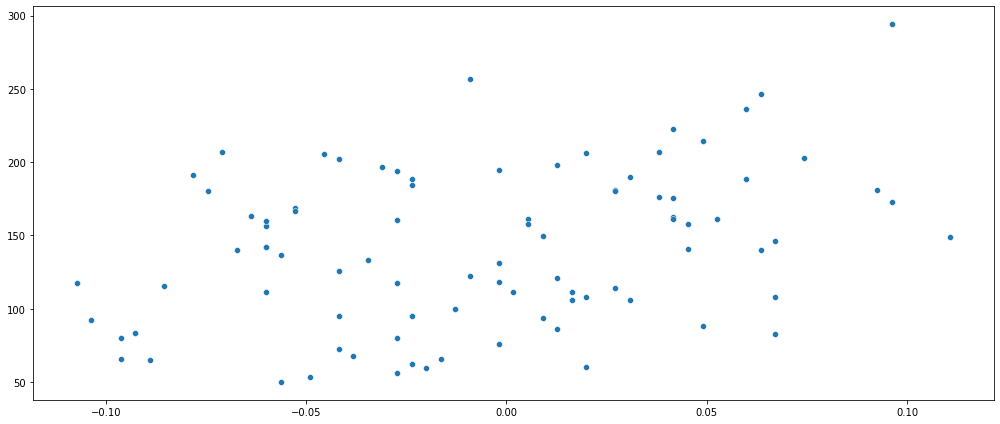

In [74]:
plt.figure(figsize=(14, 6))

sns.scatterplot(x=x_test[:, 0], y=pred)

plt.tight_layout()
plt.show()